# Calibrator Spectra Interpolation Threshold Determination

In particular we conduct testing for the shorts first.

In [142]:
import numpy as np
import statistics as stat
import scipy
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import PrizmCalibration as cl # this module is missing dependencies
from gsm_data import GSMData, get_desired_frequencies
# from data_prep import DataPrep

# For reloading the module (useful for debugging)
import data
import data_prep
try:
    reload(data) # dependent module (imported in data_prep)
    reload(data_prep)
    from data_prep import DataPrep
except:
    from importlib import reload
    reload(data) # dependent module (imported in data_prep)
    reload(data_prep)
    from data_prep import DataPrep

from helper_functions import *
import data_utils as du

import copy

In [144]:
# Find a good -- not flagged chunk of the calibrator data
# Let's do the 2021 100MHz NS data
year = '2021'
instrument = '100MHz'
channel = 'NS'

dataprep = DataPrep(instrument, channel, year)
save_mask = copy.deepcopy(dataprep.calib_mask_dict['short']) # save the real mask because we're going to modify it artificially for the test

# Apply mask of bad data
lst_masked, data_masked = dataprep.get_flagged_calibrator_data(partition='short')

Returning default mask
Returning default mask


Unmasked days = 18
Masked days = 17


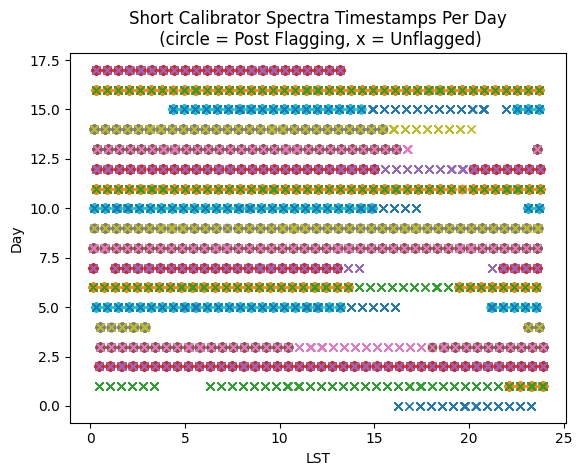

18
18


In [171]:
'''DO NOT RERUN'''

# Plot the data as a waterfall plot
# du.time_variation(data=data_masked,lst=lst_masked,minperbin=60,year=year,instrument=instrument,channel=channel,source='short')
# du.time_variation(data=dataprep.shorts_data,lst=dataprep.shorts_data_lst,minperbin=60,year=year,instrument=instrument,channel=channel,source='short')

# Split into days
lst_masked_split, data_masked_split = du.LST_days_split(lst_masked,data_masked)
lst_unmasked_split, data_unmasked_split = du.LST_days_split(dataprep.shorts_data_lst,dataprep.shorts_data)
# Scatter plot
range_len = len(lst_unmasked_split)
# range_len = 3

print('Unmasked days =',len(lst_unmasked_split))
print('Masked days =',len(lst_masked_split))

for i in range(range_len):
    try:
        plt.plot(lst_unmasked_split[i],[i for lst in lst_unmasked_split[i]],'x')
    except:
        pass
    try:
        plt.plot(lst_masked_split[i],[1+i for lst in lst_masked_split[i]],'o')
    except:
        pass
plt.xlabel('LST')
plt.ylabel('Day')
plt.title('Short Calibrator Spectra Timestamps Per Day\n (circle = Post Flagging, x = Unflagged)')
plt.show()

# add an element to make up for the missing former day 0 (100% flagged)
lst_masked_split.insert(0,np.zeros(1))
data_masked_split.insert(0,np.zeros(1))

# picking day 16
test_day = 9
test_day_lst = lst_masked_split[test_day]
test_day_data = data_masked_split[test_day]
print(len(lst_masked_split))
print(len(data_masked_split))

In [172]:
# Testing that automatically flagged mask is blank (all True, no flagging)
test_day_indices = (np.arange(0,len(lst_unmasked_split[test_day]),1) + 
                    np.sum([len(lst_unmasked_split[i]) for i in range(test_day)]))
print(save_mask[test_day_indices])
print(np.any(save_mask[test_day_indices]) == False)  # False = there are no False in the mask

np.array_equal(lst_masked_split[test_day],lst_unmasked_split[test_day]) # True = the masked and unmasked LST arrays are the same

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

True

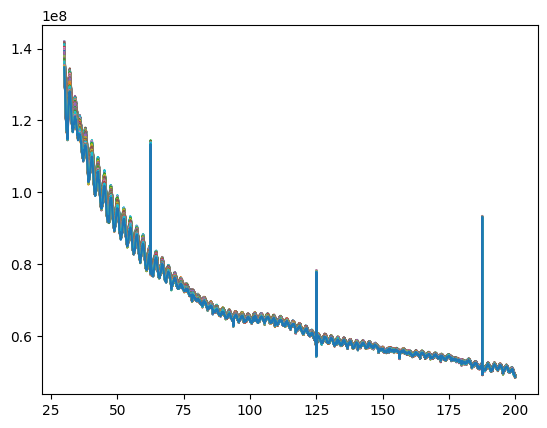

In [173]:
for i in range(len(test_day_data)):
    plt.plot(freqarr[minfreqarg:maxfreqarg],test_day_data[i][minfreqarg:maxfreqarg])

    
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
11.909318226835758
11.932582110776586
index= 5539
error= 0.0012348516731508629
11.932582110776586
index= 5539
error= 0.002210199069978572
11.932582110776586
index= 5539
error= 0.0017684298344077373
11.932582110776586
index= 5539
error= 0.001971573614587691
11.932582110776586
index= 5539
error= 0.0039808889765913825
11.932582110776586
index= 5539
error= 0.002729666880546883
11.932582110776586
index= 5539
error= 0.003785243994703872
11.932582110776586
index= 5539
error= 0.0031278069258118112
11.932582110776586
index= 5539
error= 0.0036922610592539738
11.932582110776586
index= 5539
error= 0.004910657634885211
11.932582110776586
index= 5539
error= 0.005869447131651965
11.932582110776586
index= 5539
error= 0.0049819552690886565
11.932582110776586
index= 5539
error= 0.00669695260694618
11.932582110776586
index= 5539
error= 0.006445200743021618
11.932582110776586
index= 5539
error= 0.005169219811293573
11.9325821107

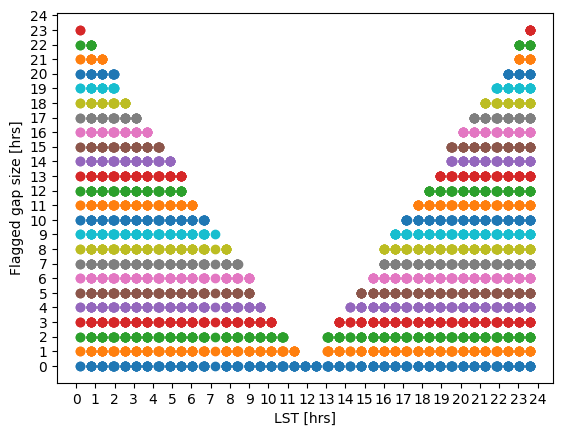

In [174]:
# Purposely flag a certain number of consecutive calibrator spectra (e.g. 1h, 2h, 5h, 7h,...)
gaps = np.arange(0,25,1)
print(gaps)
# print(gaps)

# Make sure to have a 'smallest possible gap' i.e. 1 missing spectrum ('base/minimal error')
# Here the smallest possible gap is ~0.576 hours between two different measurement rounds. 
# So maybe we go with that as the minimal gap.

# get the original array indices for day 16 from the unflagged LST
# test_day_indices = (np.arange(0,len(lst_unmasked_split[16]),1) + 
#                     np.sum([len(lst_unmasked_split[i]) for i in range(test_day)]))

# plt.plot(test_day_lst,[0 for lst in test_day_lst],'o')

# Find the spectrum closest to 12pm we'll use for comparison
closest_to_12_real = np.argmin(np.abs(test_day_lst - 12))
print(test_day_lst[closest_to_12_real])
closest_to_12_real_spectrum = test_day_data[closest_to_12_real]

# Initialize array to contain interpolation error
err_interp = np.zeros(len(gaps))

for i, gap in enumerate(gaps):
    # flag the gap (maybe modify the dataprep.mask)
    if gap == 0:
        test_mask = copy.deepcopy(save_mask[test_day_indices])
    else:
        test_mask = np.abs(test_day_lst - 12) - gap/2 > 0 # False = flag
    #print(test_mask)
    
    # this mask is only for day 16 though so I have to get the original array indices for day 16 from the unflagged LST
    test_full_mask = copy.deepcopy(save_mask)
    test_full_mask[test_day_indices] = test_mask
    
    plt.plot(test_day_lst[test_mask],[gap for lst in test_day_lst[test_mask]],'o')
    
    # need to somehow pass the modified mask to the interpolation function 
    # let's just replace the calib_mask_dict['short'] attribute
    dataprep.calib_mask_dict['short'] = test_full_mask
    
    # now call the short interpolation again, and save the interpolation result (ONLY TEST DAY)
    fullinterp_test_result = dataprep.get_shorts(dataprep.data)
    # split LST into days
    fullinterp_lst_split, fullinterp_data_split = du.LST_days_split(dataprep.lst,fullinterp_test_result)
    # take only test day data (day 16)
    test_rslt_lst = fullinterp_lst_split[test_day]
    test_rslt_data = fullinterp_data_split[test_day]
    
    # quantify error compared to real spectra
    closest_to_12_interp = np.argmin(np.abs(test_rslt_lst - test_day_lst[closest_to_12_real])) # here I've switched it to find closest to the closest real time to 12.
    print(test_rslt_lst[closest_to_12_interp])
    closest_to_12_interp_spectrum = test_rslt_data[closest_to_12_interp]
    print('index=',closest_to_12_interp)
    err_interp[i] = np.mean(np.abs(closest_to_12_real_spectrum-closest_to_12_interp_spectrum)/closest_to_12_real_spectrum)
    print('error=',err_interp[i])

plt.xlabel('LST [hrs]')
plt.ylabel('Flagged gap size [hrs]')
plt.xticks(ticks=np.arange(0,25,1))
plt.yticks(ticks=gaps)
plt.show()

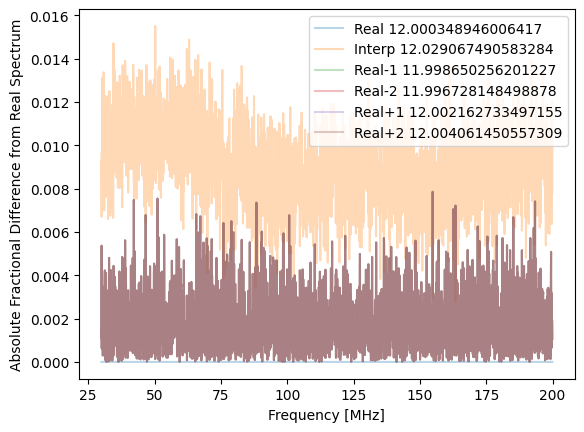

In [169]:
freqarr, freqstep = np.linspace(0,250,4096,retstep=True) # Based on number of frequency channels of the antenna
minfreq = 30
maxfreq = 200
minfreqarg = int(minfreq/freqstep)
maxfreqarg = int(maxfreq/freqstep)

# plt.plot(freqarr[minfreqarg:maxfreqarg],closest_to_12_real_spectrum[minfreqarg:maxfreqarg],label='Real '+str(test_day_lst[closest_to_12_real]),alpha=0.3)
# plt.plot(freqarr[minfreqarg:maxfreqarg],closest_to_12_interp_spectrum[minfreqarg:maxfreqarg],label='Interp '+str(test_rslt_lst[closest_to_12_interp]),alpha=0.3)
# plt.plot(freqarr[minfreqarg:maxfreqarg],test_day_data[closest_to_12_real-1][minfreqarg:maxfreqarg],label='Real-1 '+str(test_day_lst[closest_to_12_real-1]),alpha=0.3)
# plt.plot(freqarr[minfreqarg:maxfreqarg],test_day_data[closest_to_12_real-1][minfreqarg:maxfreqarg],label='Real-2 '+str(test_day_lst[closest_to_12_real-2]),alpha=0.3)
# plt.plot(freqarr[minfreqarg:maxfreqarg],test_day_data[closest_to_12_real-1][minfreqarg:maxfreqarg],label='Real+1 '+str(test_day_lst[closest_to_12_real+1]),alpha=0.3)
# plt.plot(freqarr[minfreqarg:maxfreqarg],test_day_data[closest_to_12_real-1][minfreqarg:maxfreqarg],label='Real+2 '+str(test_day_lst[closest_to_12_real+2]),alpha=0.3)

plt.plot(freqarr[minfreqarg:maxfreqarg],np.abs(closest_to_12_real_spectrum[minfreqarg:maxfreqarg]-closest_to_12_real_spectrum[minfreqarg:maxfreqarg])/closest_to_12_real_spectrum[minfreqarg:maxfreqarg],label='Real '+str(test_day_lst[closest_to_12_real]),alpha=0.3)
plt.plot(freqarr[minfreqarg:maxfreqarg],np.abs(closest_to_12_interp_spectrum[minfreqarg:maxfreqarg]-closest_to_12_real_spectrum[minfreqarg:maxfreqarg])/closest_to_12_real_spectrum[minfreqarg:maxfreqarg],label='Interp '+str(test_rslt_lst[closest_to_12_interp]),alpha=0.3)
plt.plot(freqarr[minfreqarg:maxfreqarg],np.abs(test_day_data[closest_to_12_real-1][minfreqarg:maxfreqarg]-closest_to_12_real_spectrum[minfreqarg:maxfreqarg])/closest_to_12_real_spectrum[minfreqarg:maxfreqarg],label='Real-1 '+str(test_day_lst[closest_to_12_real-1]),alpha=0.3)
plt.plot(freqarr[minfreqarg:maxfreqarg],np.abs(test_day_data[closest_to_12_real-1][minfreqarg:maxfreqarg]-closest_to_12_real_spectrum[minfreqarg:maxfreqarg])/closest_to_12_real_spectrum[minfreqarg:maxfreqarg],label='Real-2 '+str(test_day_lst[closest_to_12_real-2]),alpha=0.3)
plt.plot(freqarr[minfreqarg:maxfreqarg],np.abs(test_day_data[closest_to_12_real-1][minfreqarg:maxfreqarg]-closest_to_12_real_spectrum[minfreqarg:maxfreqarg])/closest_to_12_real_spectrum[minfreqarg:maxfreqarg],label='Real+1 '+str(test_day_lst[closest_to_12_real+1]),alpha=0.3)
plt.plot(freqarr[minfreqarg:maxfreqarg],np.abs(test_day_data[closest_to_12_real-1][minfreqarg:maxfreqarg]-closest_to_12_real_spectrum[minfreqarg:maxfreqarg])/closest_to_12_real_spectrum[minfreqarg:maxfreqarg],label='Real+2 '+str(test_day_lst[closest_to_12_real+2]),alpha=0.3)
# plt.yscale('log')
# plt.ylim(bottom=0,top=2*10**8)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Absolute Fractional Difference from Real Spectrum')
plt.legend()
plt.show()

In [183]:
# Finding indices of the LSTs closest to 12pm
# plt.plot(test_rslt_lst,[0 for lst in test_rslt_lst],'o')
close_to_12_test = np.abs(test_rslt_lst - 12) <= 0.1
print(np.any(close_to_12_test) == True)
print(test_rslt_lst[len(test_rslt_lst)//2-10:len(test_rslt_lst)//2+10])

# closest to 12pm -- from interpolated LSTs
closest_to_12_interp = np.argmin(np.abs(test_rslt_lst - 12))
print(test_rslt_lst[closest_to_12_interp])

# closest to 12pm -- from real short spectra
closest_to_12_real = np.argmin(np.abs(test_day_lst - 12))
print(test_day_lst[closest_to_12_real])

True
[11.93228936 11.93398469 11.93576685 11.93744977 11.93948822 12.02906749
 12.03088828 12.03257943 12.03439467 12.03620636 12.03798468 12.0397597
 12.04169082 12.04339701 12.0451965  12.04699523 12.0488246  12.05060293
 12.0522974  12.05432568]
12.029067490583284
12.000348946006417


Text(0.5, 1.0, 'Interpolation Error at ~12h LST')

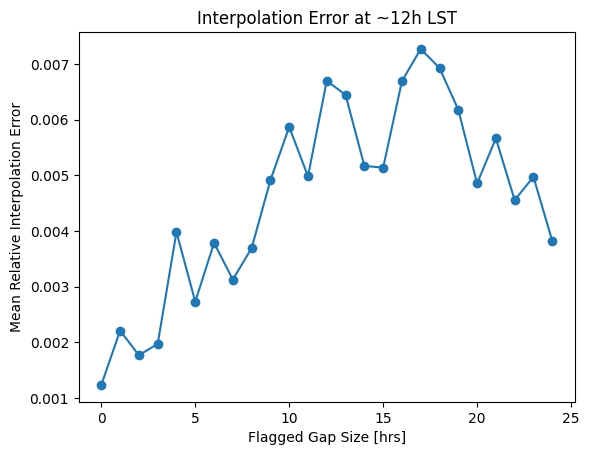

In [175]:
# Make plot to see how we can reasonably optimize between high threshold and low error
plt.plot(gaps,err_interp,'o-')
plt.xlabel('Flagged Gap Size [hrs]')
plt.ylabel('Mean Relative Interpolation Error')
plt.title('Interpolation Error at ~12h LST')